# CMPINF0010 FINAL PROJECT- What is the best neighborhood in Pittsburgh to grow up in?

# Introduction

---------------------------------------------------------------------------------------------------------------

For our project, we decided to look at what neighborhood in Pittsburgh would be the best to grow up in. We wanted to find a neighborhood that would have good recreation, schooling, and that would be safe. For that reason, we each picked a metric that could support each desire. We looked at public art to satisfy the need for recreation, school enrollment to see where one could have a thriving education, and traffic situations to see where a child could be most safe on the streets. We felt these were three metrics that could be used to show a good neighborhood, especially if the neighborhood was successful in all three areas. If these metrics are not met, we felt that this could be a non-negotiable reason for not choosing to live in said neighborhood. Our data analysis is seen below:

# Corey's Metric- Best Neighborhood for Public Art

---------------------------------------------------------------------------------------------------------------

In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import geopandas

## Dataset

In [2]:
# loads up data of all the public art in Pittsburgh and displays some
pgh_art_data = pd.read_csv("pgh_art_data.csv")
pgh_art_data = pgh_art_data.dropna()
pgh_art_data.head()

,id,name,title,artist_name,art_type,park,image,neighborhood,council_district,ward,tract,public_works_division,pli_division,police_zone,fire_zone,latitude,longitude
121,1678423235,WM00001000,Colonel James Anderson Monument,Daniel Chester French,Individual and Historic Monuments,Buhl Community Park at Allegheny Square,https://tools.wprdc.org/images/pittsburgh/art_...,Allegheny Center,1.0,22.0,4.200356e+10,1.0,22.0,1.0,1-6,40.453030,-80.005920
122,1527419187,WM00002000,George Washington Memorial,Edward Ludwig Albert Pausch,Individual and Historic Monuments,Allegheny Commons,https://tools.wprdc.org/images/pittsburgh/art_...,Allegheny Center,1.0,22.0,4.200356e+10,1.0,22.0,1.0,1-7,40.454559,-80.009575
123,1790632922,WM00003000,Hampton Battery Memorial,Unknown,War Memorials,Allegheny Commons,https://tools.wprdc.org/images/pittsburgh/art_...,Allegheny Center,1.0,22.0,4.200356e+10,1.0,22.0,1.0,1-20,40.450890,-80.000960
124,61964334,WM00004000,Maine Memorial,Charles Keck,War Memorials,Allegheny Commons,https://tools.wprdc.org/images/pittsburgh/art_...,Allegheny Center,1.0,22.0,4.200356e+10,1.0,22.0,1.0,1-7,40.453150,-80.010940
125,158501549,WM00005000,Civil War Soldiers Monument (Allegheny County),Peter C. Reniers,War Memorials,Allegheny Commons,https://tools.wprdc.org/images/pittsburgh/art_...,Allegheny Center,1.0,22.0,4.200356e+10,1.0,22.0,1.0,1-7,40.453050,-80.012500


After loading my data set into the notebook I went through the data and finds how many pieces of public art are in each neighborhood.



In [3]:
import csv

with open ("pgh_art_data.csv") as f:
    pgh_art_data = [row for row in csv.reader(f)]
    
# goes through the data and counts how many pieces of art are in each neighborhood
art_counter = dict()

for row in pgh_art_data[1:]:
    neighborhood = row[7]
    
    if neighborhood not in art_counter:
        art_counter[neighborhood] = 1
    else:
        art_counter[neighborhood] = art_counter[neighborhood] + 1
art_counter

{'Oakwood': 1,
 'Elliott': 3,
 'Central Business District': 27,
 'Carrick': 2,
 'Brookline': 2,
 'South Side Slopes': 3,
 '': 2,
 'Hazelwood': 3,
 'Highland Park': 10,
 'Squirrel Hill South': 20,
 'Perry North': 2,
 'Beltzhoover': 3,
 'Spring Hill-City View': 4,
 'West End': 2,
 'Greenfield': 3,
 'Shadyside': 6,
 'East Allegheny': 2,
 'Squirrel Hill North': 2,
 'Beechview': 7,
 'Crawford-Roberts': 3,
 'Lincoln-Lemington-Belmar': 2,
 'Hays': 1,
 'Allegheny Center': 18,
 'North Oakland': 1,
 'South Side Flats': 9,
 'Central Oakland': 5,
 'Point Breeze': 3,
 'Allegheny West': 1,
 'Strip District': 2,
 'Mount Washington': 2,
 'Brighton Heights': 5,
 'Perry South': 1,
 'North Shore': 8,
 'Upper Hill': 2,
 'Garfield': 2,
 'Central Lawrenceville': 2,
 'Upper Lawrenceville': 1,
 'Stanton Heights': 1,
 'Duquesne Heights': 3,
 'Allentown': 2,
 'East Liberty': 1,
 'Bloomfield': 1,
 'East Carnegie': 1,
 'East Hills': 1,
 'Lower Lawrenceville': 5,
 'Overbrook': 1,
 'Polish Hill': 1,
 'Regent Square

I then split this data into two different dictionaries and combined them into a single dataframe so It would work properly when plotting the map



In [4]:
#split dict into neighborhoods and number of pieces of art
neighborhoods = []
pieces_of_art = []
items = art_counter.items()
for item in items:
    neighborhoods.append(item[0]), pieces_of_art.append(item[1])

In [5]:
#create dataframe using my two dictionaries
art_df = pd.DataFrame({"neighborhood":neighborhoods,"number of pieces of art":pieces_of_art})

#sorted the dataframe from greatest to least
art_df.sort_values(by = "number of pieces of art", ascending = False)

,neighborhood,number of pieces of art
2,Central Business District,27
9,Squirrel Hill South,20
22,Allegheny Center,18
8,Highland Park,10
24,South Side Flats,9
32,North Shore,8
18,Beechview,7
15,Shadyside,6
44,Lower Lawrenceville,5
30,Brighton Heights,5


I then decided to plot the data into a bar graph to compare the top five neighborhoods with the most pieces of art.



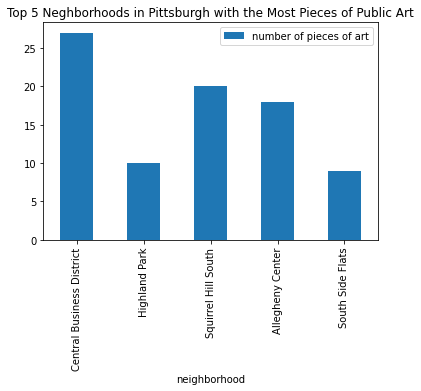

In [37]:
art_df_limited = art_df[art_df['number of pieces of art']>= 9]
art_df_limited.plot.bar(x="neighborhood", y = "number of pieces of art", title = "Top 5 Neghborhoods in Pittsburgh with the Most Pieces of Public Art")

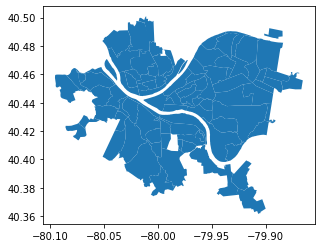

In [11]:
#loaded in shape file
neighborhoods = geopandas.read_file("Neighborhoods/Neighborhoods_.shp")
neighborhoods.plot()

I then combined the the data from the dataframe I made with the Pittsburgh shape file.

In [12]:
#merge my art data frame and the shape file
art_map = neighborhoods.merge(art_df, how = 'left', left_on='hood', right_on='neighborhood')
art_map[['hood','number of pieces of art','geometry']]

,hood,number of pieces of art,geometry
0,Central Oakland,5.0,"POLYGON ((-79.95304 40.44203, -79.95302 40.442..."
1,North Oakland,1.0,"POLYGON ((-79.95455 40.45882, -79.95427 40.458..."
2,West Oakland,NaN,"POLYGON ((-79.96230 40.44294, -79.96220 40.442..."
3,Crawford-Roberts,3.0,"POLYGON ((-79.98275 40.44641, -79.98273 40.446..."
4,Strip District,2.0,"POLYGON ((-79.97494 40.45629, -79.97484 40.456..."
...,...,...,...
85,Ridgemont,NaN,"POLYGON ((-80.03431 40.43366, -80.03424 40.433..."
86,West End,2.0,"POLYGON ((-80.02869 40.44454, -80.02845 40.444..."
87,California-Kirkbride,NaN,"POLYGON ((-80.02039 40.46285, -80.02022 40.462..."
88,Glen Hazel,NaN,"POLYGON ((-79.92030 40.41205, -79.92027 40.412..."


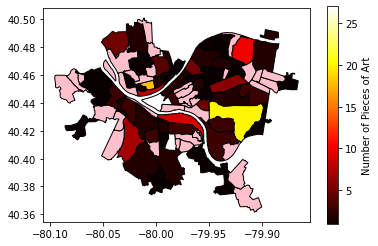

In [13]:
#plots the map of the data
art_map.plot(column='number of pieces of art',
             cmap = 'hot',
            edgecolor="black",
            legend=True,
            legend_kwds={'label':"Number of Pieces of Art"},
            missing_kwds={"color":"pink"})

## Conclusion

Based off the data from my map and the the bar graph I believe the best neighborhood in Pittsburgh is either the Central Buisness Distric or Squirrel Hill South. The Central Business District has 27 art pieces, which is seven more then the next best, which is Squirrel Hill South. This gives the CBD a large advantage over any other neighborhood in the dataset. The top neighborhoods for art are especially important, because so many neighborhoods are only reporting one piece. Having an abudance leads to better recreation and would therefore satisfy more people. 

# Kaitlyn's Metric- Student Enrollment in Pittsburgh Neighborhoods

---------------------------------------------------------------------------------------------------------------

## Dataset 

The dataset I chose was from the WPRDC. This dataset shows the numbers of student enrollment in different Pittsburgh neighborhoods. Here I am inserting the CSV to be read for my future data analysis.

In [6]:
kidPopulation = pd.read_csv("https://data.wprdc.org/dataset/3cb2b9c2-66e2-4ffa-b0a1-35fb2c6f7230/resource/eb1f8714-e0eb-4614-acfe-dfe0ebab942f/download/school-enrollment-by-detailed-level-of-school-for-the-population-3-years-and-over", 
                            index_col = "Neighborhood",
                            parse_dates=True) #import data set for student enrollment

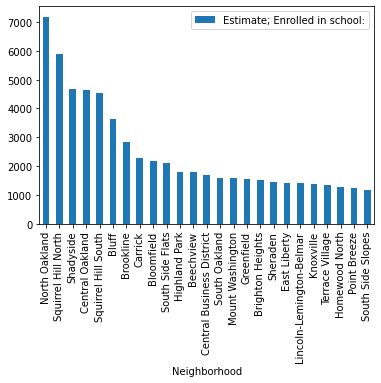

In [7]:
studentEnrollment=pd.DataFrame(kidPopulation["Estimate; Enrolled in school:"])

sE=studentEnrollment.sort_values("Estimate; Enrolled in school:", ascending=False)
#orders the neighborhoods in order of highest to lowest in terms of school enrollment numbers

sE.head(25).plot.bar()
#create a bar graph to depict best neighborhoods in the matter before standardization

I first wanted to begin by showing a raw chart of the data without any form of standardization. I wanted people to be able to see how the data changes once it is standardized. In this example, the bar graph shows the "best enrollment" neighborhoods initially. North Oakland, Squirrel Hill North, Shadyside, and Central Oakland are among the best. 

In the next steps, I am standardizing my data by creating a ratio between the estimated total population and the estimated about of the population who is enrolled in school. My data set was lucky enough to have each of these columns, which saved me from having to merge datasets in this part. First, I create the ratio by dividing the amount enrolled in school by the entire population. In order to make this a little more clear, I used a multiplier of 1000 to get some larger numbers.

Then, I had to drop columns before and after the columns I wanted to highlight. I wanted it to be clear the point I am trying to make and this was the most successful way to do so. As you can see, this dataset required many columns to be dropped. 

In [8]:
kidPopulation["ratio_to_population"]=kidPopulation["Estimate; Enrolled in school:"]/kidPopulation["Estimate; Total:"]*100
#creates a ratio between the amount of people enrolled in school versus the entire population recorded

population=kidPopulation.drop(columns = ["Id", "Margin of Error; Total:"])
#drops the initial two columns before estimate enrolled in school that are not needed in depiction

populationRatio=population.drop(columns = ["Margin of Error; Enrolled in school:", 
                                           "Estimate; Enrolled in school: - Enrolled in nursery school, preschool", 
                                           "Margin of Error; Enrolled in school: - Enrolled in nursery school, preschool", 
                                           "Estimate; Enrolled in school: - Enrolled in kindergarten", 
                                           "Margin of Error; Enrolled in school: - Enrolled in kindergarten",
                                           "Estimate; Enrolled in school: - Enrolled in grade 1", 
                                           "Margin of Error; Enrolled in school: - Enrolled in grade 1", 
                                           "Estimate; Enrolled in school: - Enrolled in grade 2",
                                           "Margin of Error; Enrolled in school: - Enrolled in grade 2", 
                                           "Estimate; Enrolled in school: - Enrolled in grade 3", 
                                           "Margin of Error; Enrolled in school: - Enrolled in grade 3", 
                                           "Estimate; Enrolled in school: - Enrolled in grade 4", 
                                           "Margin of Error; Enrolled in school: - Enrolled in grade 4", 
                                           "Estimate; Enrolled in school: - Enrolled in grade 5", 
                                           "Margin of Error; Enrolled in school: - Enrolled in grade 5", 
                                           "Estimate; Enrolled in school: - Enrolled in grade 6", 
                                           "Margin of Error; Enrolled in school: - Enrolled in grade 6",
                                           "Estimate; Enrolled in school: - Enrolled in grade 7", 
                                           "Margin of Error; Enrolled in school: - Enrolled in grade 7", 
                                           "Estimate; Enrolled in school: - Enrolled in grade 8",
                                           "Margin of Error; Enrolled in school: - Enrolled in grade 8",
                                           "Estimate; Enrolled in school: - Enrolled in grade 9", 
                                           "Margin of Error; Enrolled in school: - Enrolled in grade 9",
                                           "Estimate; Enrolled in school: - Enrolled in grade 10",
                                           "Margin of Error; Enrolled in school: - Enrolled in grade 10",
                                           "Estimate; Enrolled in school: - Enrolled in grade 11",
                                           "Margin of Error; Enrolled in school: - Enrolled in grade 11",
                                           "Estimate; Enrolled in school: - Enrolled in grade 12", 
                                           "Margin of Error; Enrolled in school: - Enrolled in grade 12",
                                           "Estimate; Enrolled in school: - Enrolled in college, undergraduate years",
                                           "Margin of Error; Enrolled in school: - Enrolled in college, undergraduate years",
                                           "Estimate; Enrolled in school: - Graduate or professional school",
                                           "Margin of Error; Enrolled in school: - Graduate or professional school",
                                           "Estimate; Not enrolled in school",
                                           "Margin of Error; Not enrolled in school"])
#drops the rest of the columns that are unneeded before ratio to population

populationRatio.head()
#calls the data in a table for showing

,Estimate; Total:,Estimate; Enrolled in school:,ratio_to_population
Neighborhood,,,
Allegheny Center,1389.0,394.0,28.365731
Allegheny West,343.0,61.0,17.784257
Allentown,2520.0,965.0,38.293651
Arlington,1823.0,427.0,23.422929
Arlington Heights,213.0,40.0,18.779343


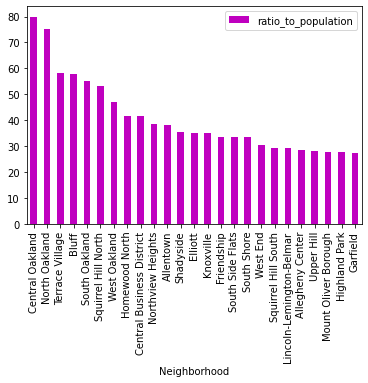

In [9]:
ratio=pd.DataFrame(populationRatio["ratio_to_population"])

graphRatio=ratio.sort_values("ratio_to_population", ascending=False)
#sorts values so that they are in ascending order from highest to lowest ratio value

graphRatio.head(25).plot.bar(color = "m")
#calls a bar graph for the top 25 neighborhoods

This bar graph is exactly the same technique as the first one I created. However, now it is more accurate standardized data. This is the best way for us to be able to view which neighborhoods have the best school enrollment ratio. The higher the number, the better the enrollment per population is. There are some similiarities between this graph and the other such as Central Oakland and North Oakland both still being here. With that being said, there are some new neighborhoods here like Bluff, South Oakland, and Terrace Village that we could not have accurately represented withtout that extra step in creating the ratio.


For the final part of data analysis, I created this map. In the map, the yellow-orange represents the best neighborhoods for enrollment. The pink/purple that represents most of the map, depicts the more average neighborhoods that may be okay, but also do not stand out in anyway. The dark purple and black show the worst neighborhoods that would not be the best environment for an abudnace of education opportunities. 


The map is shown here:

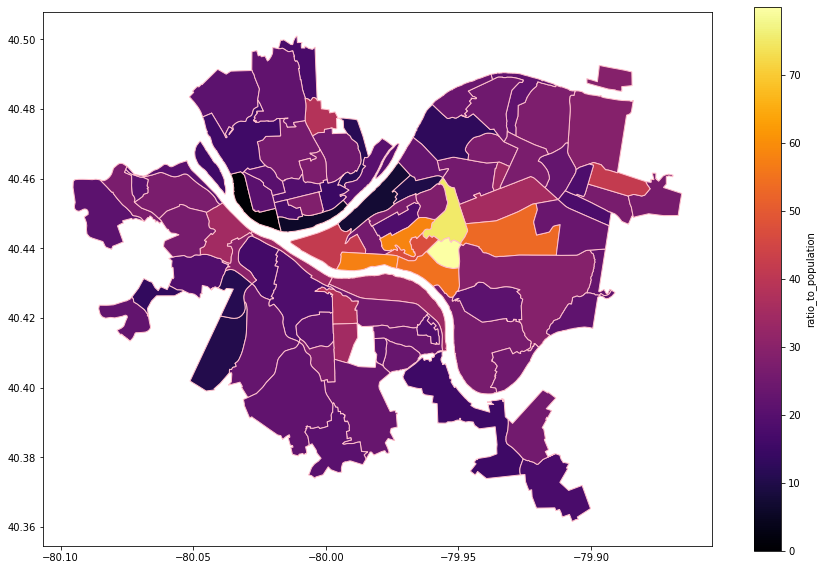

In [44]:
neighborhoods = geopandas.read_file("https://data.wprdc.org/dataset/e672f13d-71c4-4a66-8f38-710e75ed80a4/resource/c5a93a8e-03d7-4eb3-91a8-c6b7db0fa261/download/dbd133a206c")
#import reading the neighborhood csv

school_map=neighborhoods.merge(kidPopulation, how = "left", left_on = "hood", right_on = "Neighborhood") 
#merge the kidPopulation data with the neighborhood map


#display of map
school_map.plot(column="ratio_to_population",
               cmap = "inferno",
               edgecolor = "pink", 
               legend = True,
               legend_kwds = {"label" : "ratio_to_population"}, 
               figsize = (15, 10))
#creates map in terms of ratio to population variable

## My Conclusion

Throughout my data analysis, I was trying to determine which neighborhood in Pittsburgh would have the best showing for student enrollment in schools throughout the city. I thought this was an interesting metric as highest enrollment in schools often correlates to a more fruitful and educated environment for children. To deteremine this, I needed to standardize my data knowing that simply which neighborhood had the highest would not being telling enough. I made a ratio between the estimated total population and the estimate of student enrolled in school in order to maek a final determinations. 
Based on this data the top 5 nieghborhoods for school enrollment are:
1. Central Oakland
2. North Oakland
3. Terrace Village
4. Bluff
5. South Oakland

Some of these neighborhoods being in the top 5 were not surprising to me as a student here at Pitt. I think it is very known that there are a multitude of highly rated institutes in this area including undergraduate, graduate, high school, and so on.

# Group Conclusion

---------------------------------------------------------------------------------------------------------------

In order to find a final and conlusive way to determine the best neighborhood for our metrics, we have to create a final metric. To do that, I first reset the index of the art metric to match the index of the population ratio index. Next, I combine the datasets into one total dataset that shows population ratio and the number of art pieces in a stacked graph. In order to have both metrics have more of the same effect, I used a multiplier for the pieces of art of 2.66. The graph is then arranged from best neighborhood in terms of the final metric, to the worst neighborhood. After this, the top 5 neighborhoods is called in a list so the neighborhood name and final metric can be seen as well as the data for each metric. This allows us to have absolute knowledge of the best neighborhood in Pittsburgh for our metric.

In [9]:
art_df1=art_df.set_index("neighborhood")
#reset index of art to match index of population ratio

<ipython-input-10-0a579380fefc>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_combined1["Combined Metric"]=df_combined1["ratio_to_population"]+df_combined1["number of pieces of art"]


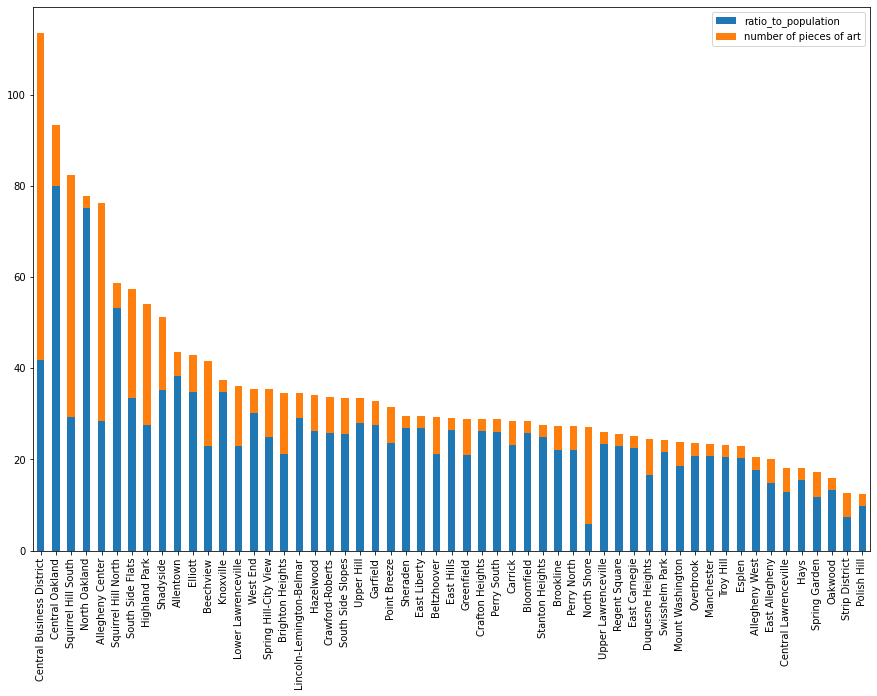

In [10]:
df=pd.DataFrame(populationRatio["ratio_to_population"])
df2=pd.DataFrame(art_df1["number of pieces of art"])*2.66 
#make both data sets bare similar weight

df_combined = df.add(df2, fill_value=0)
df_combined1= df_combined.dropna(0)
#add datasets together and drop neighborhoods with NA

df_combined1["Combined Metric"]=df_combined1["ratio_to_population"]+df_combined1["number of pieces of art"]
combinedMetric= df_combined1.sort_values(by = "Combined Metric", ascending=False)
#combine metrics into one total metric that can be graph and order it from best to worst

combinedMetric[["ratio_to_population", "number of pieces of art"]].plot.bar(stacked = True, figsize = (15, 10))
#create the bar graph by stacking each metric on top of each other



In [12]:
combinedMetric= df_combined1.sort_values(by= "Combined Metric", ascending= False)
combinedMetric.head()
#show data for the top 5 performing neighborhoods based on the final metric total value

,number of pieces of art,ratio_to_population,Combined Metric
Central Business District,71.82,41.738915,113.558915
Central Oakland,13.30,79.972518,93.272518
Squirrel Hill South,53.20,29.277885,82.477885
North Oakland,2.66,75.190800,77.850800
Allegheny Center,47.88,28.365731,76.245731
